In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


Using TensorFlow backend.


In [2]:
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
ENCODE_DIR = os.getcwd()
tensorboard = TensorBoard(log_dir='ENCODE_DIR', histogram_freq=0,
                         write_graph=True, write_images=False)

In [15]:
from tensorboardcolab import TensorBoardColabCallback
tbc=TensorBoardColab()

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

Wait for 8 seconds...
TensorBoard link:
https://3bae3650.ngrok.io


In [17]:
history=autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3318 - val_loss: 0.3169
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3287 - val_loss: 0.3134
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.3261 - val_loss: 0.3105
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3239 - val_loss: 0.3079
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3221 - val_loss: 0.3057
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3206 - val_loss: 0.3038
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3193 - val_loss: 0.3022
Epoch 8/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3183 - val_loss: 0.3006
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3173 - val_loss: 0.2992
Epoch

In [0]:
prediction = autoencoder.predict(x_test_noisy)

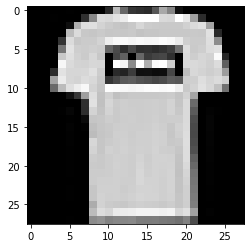

In [19]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1].reshape(28,28))
plt.gray()
plt.show()

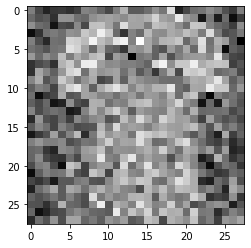

In [20]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[1].reshape(28,28))
plt.show()

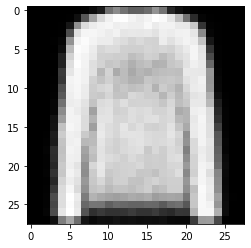

In [21]:
from matplotlib import pyplot as plt
plt.imshow(prediction[1].reshape(28,28))
plt.show()

Text(0.5, 1.0, 'Loss Curves : ')

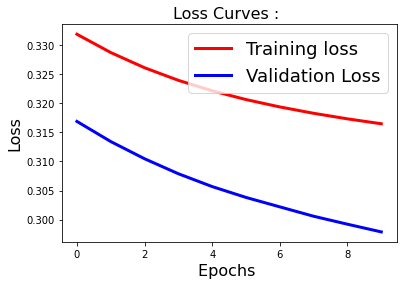

In [22]:
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves : ', fontsize=16)